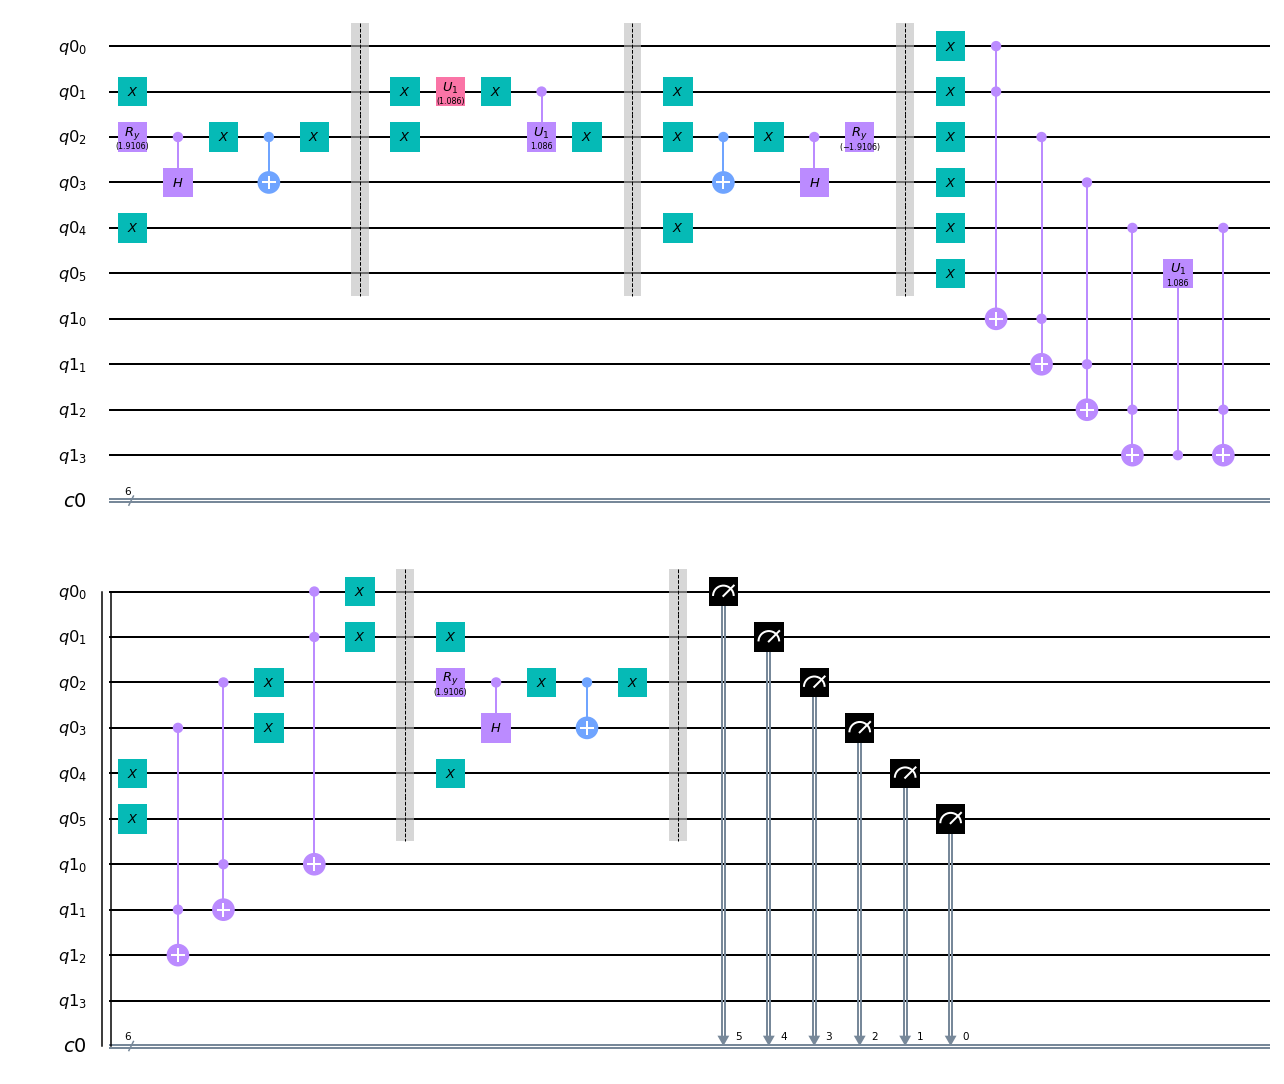

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

qr = QuantumRegister(6)
anc = QuantumRegister(4)
cr = ClassicalRegister(6)

gc = QuantumCircuit(qr,cr,anc)

#initStates

#gc.ry(1.2310,qr[0])

gc.x(qr[1])

gc.ry(1.9106,qr[2])

gc.ch(2,3)

gc.x(qr[2])
gc.cx(2,3)
gc.x(qr[2])

gc.x(qr[4])

gc.barrier(qr)

#oracle

gc.x(qr[1])
gc.u1(1.086,qr[1])
gc.x(qr[1])

gc.x(qr[2])
gc.cu1(1.086,qr[1],qr[2])
gc.x(qr[2])

gc.barrier(qr)

#W^-1

gc.x(qr[1])

gc.x(qr[2])
gc.cx(2,3)
gc.x(qr[2])

gc.ch(2,3)

gc.ry(-1.9106,qr[2])

gc.x(qr[4])

gc.barrier(qr)

#I0

gc.x(qr[5])

#gc.x(qr[0])
#gc.x(qr[1])
#gc.x(qr[2])
#gc.x(qr[3])
#gc.x(qr[4])

gc.x(qr[0])
gc.x(qr[1])
gc.x(qr[2])
gc.x(qr[3])
gc.x(qr[4])

# compute
gc.ccx(qr[0], qr[1], anc[0])
for i in range(2, 5):
    gc.ccx(qr[i], anc[i-2], anc[i-1])


# copy

gc.cu1(1.086,anc[3], qr[5])

# uncompute
for i in range(4, 1, -1):
    gc.ccx(qr[i], anc[i-2], anc[i-1])
gc.ccx(qr[0], qr[1], anc[0])
#gc.cu1(1.2310,qr[4],qr[5])

gc.x(qr[0])
gc.x(qr[1])
gc.x(qr[2])
gc.x(qr[3])
gc.x(qr[4])

gc.x(qr[5])


gc.barrier(qr)

#W

gc.x(qr[1])

gc.ry(1.9106,qr[2])

gc.ch(2,3)

gc.x(qr[2])
gc.cx(2,3)
gc.x(qr[2])

gc.x(qr[4])

gc.barrier(qr)

gc.measure (qr[0], cr[5])
gc.measure (qr[1], cr[4])
gc.measure (qr[2], cr[3])
gc.measure (qr[3], cr[2])
gc.measure (qr[4], cr[1])
gc.measure (qr[5], cr[0])

gc.draw(output="mpl")


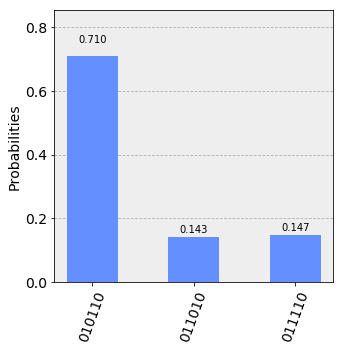

In [2]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(gc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer,figsize=(5, 5))